# Water Sheet

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import solarpy
import datetime

currentDir = os.getcwd()
sys.path.append(os.path.join(currentDir, '../code/'))
import geomUtils as geom
import IceSheet

### Simulate a Day or Two

In [2]:
# __init__
dateTimeStart = datetime.datetime(2021, 2, 21, 0, 0)
myIce = IceSheet.IceSheet(dateTime=dateTimeStart, sheet='blackIce', thickness=200.0, crystalSize=100.0, lat=55.71, alt=10)
myWater = IceSheet.IceSheet(dateTime=dateTimeStart, sheet='freshWater', thickness=400.0, crystalSize=100.0, lat=55.71, alt=10)
myWater.setTransmittance(myIce)

When: 2021-02-21 00:00:00
Where: lat = 55.71°, alt = 10 m
What: blackIce
When: 2021-02-21 00:00:00
Where: lat = 55.71°, alt = 10 m
What: freshWater


In [3]:
# setupModel
spatialNodeCount = 101
timeStep = 10*60  # s
aEnv=[0.05, 0.9, 0.05]
TEnv=[-2.0, -20.0, -270.]
aEnvW=[1.]
TEnvW=[0.]

# get started
# A, B, b, UInit = myIce.setupModel(IC=[-0.92, 0.], windSpeed=5., aEnv=aEnv, TEnv=TEnv, zNodes=spatialNodeCount, tStep=timeStep, isVerbose=True)
AW, BW, bW, UInitW = myWater.setupModel(IC=[0., 3.], aEnv=aEnv, TEnv=TEnv, fluidVelocity=0.02, zNodes=spatialNodeCount, tStep=timeStep, isVerbose=True)

thermal diffusivity a = 1.33e-07 m2/s
spatial stepsize dz = 4.00 mm
temporal stepsize dt = 600.00 s
timescale tScale = 1204901.8 s
sigma = 2.489829402580374
[[ 5.97965881 -2.4898294   0.         ...  0.          0.
   0.        ]
 [-2.4898294   5.97965881 -2.4898294  ...  0.          0.
   0.        ]
 [ 0.         -2.4898294   5.97965881 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  5.97965881 -2.4898294
   0.        ]
 [ 0.          0.          0.         ... -2.4898294   5.97965881
  -2.4898294 ]
 [ 0.          0.          0.         ...  0.         -2.4898294
   5.97965881]]
50 [0.79370053 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053
 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053
 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053
 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053
 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053 0.79370053
 0.79370053 0.79370053 0.79370053 0.793

In [4]:
bW.shape

(101,)

In [5]:
myWater._b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
bW

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
myWater._IC  #[0], myWater._IC[-1]

array([0.        , 0.04999792, 0.09996669, 0.14983163, 0.19946949,
       0.24871132, 0.2973476 , 0.34513629, 0.39181355, 0.43710692,
       0.48074986, 0.52249638, 0.56213427, 0.59949543, 0.63446261,
       0.66697178, 0.69701061, 0.72461369, 0.74985538, 0.77284145,
       0.79370053, 0.81257597, 0.82961882, 0.84498189, 0.85881534,
       0.87126326, 0.88246158, 0.89253663, 0.90160454, 0.90977113,
       0.91713213, 0.92377364, 0.92977281, 0.93519851, 0.94011207,
       0.94456802, 0.94861478, 0.95229531, 0.95564774, 0.95870587,
       0.96149971, 0.9640559 , 0.9663981 , 0.96854735, 0.97052239,
       0.97233991, 0.9740148 , 0.97556036, 0.97698847, 0.97830979,
       0.97953387, 0.98066927, 0.98172371, 0.98270412, 0.98361676,
       0.98446727, 0.98526076, 0.98600184, 0.98669471, 0.98734316,
       0.98795063, 0.98852029, 0.98905497, 0.98955729, 0.99002964,
       0.99047419, 0.99089294, 0.9912877 , 0.99166016, 0.99201186,
       0.9923442 , 0.99265849, 0.99295593, 0.99323762, 0.99350

In [8]:
myWater._THi, myWater._TLo

(3.0, 0.0)

In [9]:
# simulate
totalTime = 2*24*3600  # s
timeStepCount = totalTime//timeStep
timeStepCount

288

In [10]:
# dateTimes, S0s, USoln, epsSoln = myIce.simulate(UInit, aEnv, TEnv, timeStepCount)
dateTimes, S0sW, USolnW, botMeltRates = myWater.simulate(UInitW, aEnvW, TEnvW, timeStepCount)

In [11]:
USolnW.shape

(288, 101)

In [12]:
S0s = S0sW
idxSunUp = []
idxSunDn = []
for i in range(len(dateTimes)):
    if S0s[i] > 0 and S0s[i-1] == 0:
        idxSunUp.append(i)
    if S0s[i] == 0 and S0s[i-1] > 0:
        idxSunDn.append(i-1)
print(idxSunUp, idxSunDn)

[] []


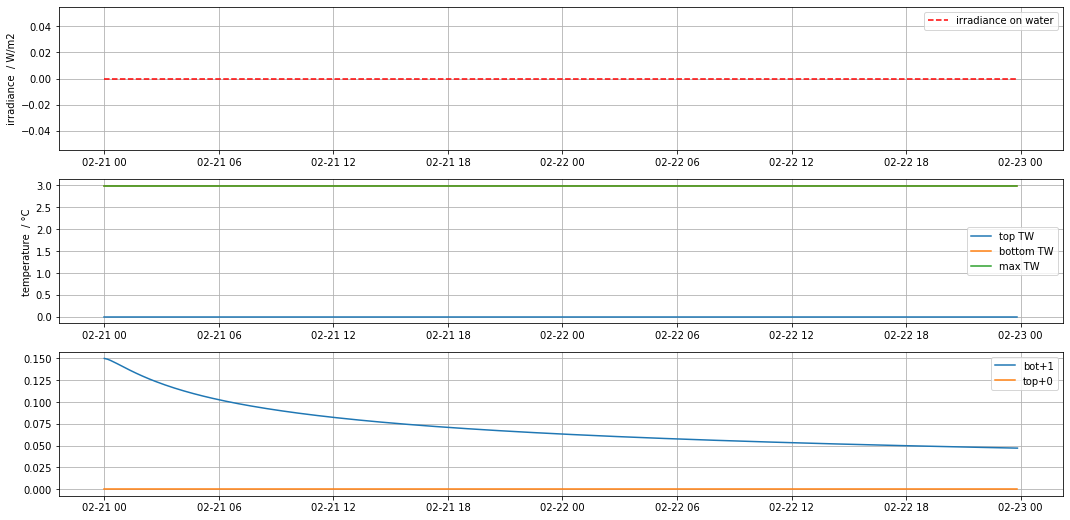

In [13]:
UMaxsW = []
for j in range(len(USolnW)):
    UMaxsW.append(np.max(USolnW[j, :]))

nPlot = 3
fig, axs = plt.subplots(nPlot, 1, figsize=(18, nPlot*3))
i = 0
axs[i].plot(dateTimes, S0sW, '--', color='red', label='irradiance on water')
axs[i].set_ylabel('irradiance  / W/m2')
i = 1
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 0]), label='top TW')
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, -1]), label='bottom TW')
axs[i].plot(dateTimes, myWater.makeUOneD(np.array(UMaxsW)), label='max TW')
axs[i].set_ylabel('temperature  / °C')
i = 2
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 1]), label='bot+1')
axs[i].plot(dateTimes, myWater.makeUOneD(USolnW[:, 0]), label='top+0')
for i in range(nPlot):
    for j in range(len(idxSunUp)):
        axs[i].axvspan(dateTimes[idxSunUp[j]], dateTimes[idxSunDn[j]], color='yellow', alpha=0.2)
    axs[i].grid()
    axs[i].legend()    

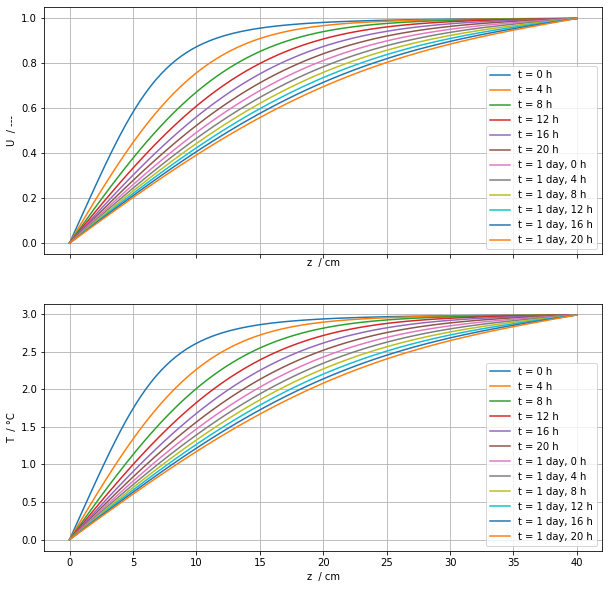

In [14]:
TSolnW = myWater.makeUOneD(USolnW)

zW = np.linspace(0, spatialNodeCount, spatialNodeCount)*myWater._h/spatialNodeCount*100  # cm

plotInterval = 4  # h
idxInterval = (plotInterval*3600)//timeStep

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
for j in list(range(len(USolnW)))[::idxInterval]:
    timeLabel = 't = '+'{} h'.format(str(dateTimes[j]-dateTimes[0])[:-6])
    i = 0
    axs[i].plot(zW, USolnW[j, :], label=timeLabel)
    axs[i].set_ylabel('U  / ---')
    i = 1
    axs[i].plot(zW, TSolnW[j, :], label=timeLabel)
    axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].set_xlabel('z  / cm')
    axs[i].legend()
    axs[i].grid()